In [ ]:
# Importing necessary libraries and dependencies

import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from io import StringIO
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [ ]:
plt.style.use('bmh')

# Importing the dataset

data=pd.read_csv("/content/sample_data/Tractor-Sales.csv")
data.head()

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


In [ ]:
# Data Preprocessing and filtration

data.shape

(144, 2)

In [ ]:
dates=pd.date_range(start='2003-01-01',freq='MS',periods=len(data))

dates

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [ ]:
data["Month"]=dates.month

data.head()

,Month-Year,Number of Tractor Sold,Month
0,Jan-03,141,1
1,Feb-03,157,2
2,Mar-03,185,3
3,Apr-03,199,4
4,May-03,203,5


In [ ]:
data["Year"]=dates.year

data.head()

,Month-Year,Number of Tractor Sold,Month,Year
0,Jan-03,141,1,2003
1,Feb-03,157,2,2003
2,Mar-03,185,3,2003
3,Apr-03,199,4,2003
4,May-03,203,5,2003


In [ ]:
import calendar

data["Month"]=data["Month"].apply(lambda x: calendar.month_abbr[x])

data.head()

,Month-Year,Number of Tractor Sold,Month,Year
0,Jan-03,141,Jan,2003
1,Feb-03,157,Feb,2003
2,Mar-03,185,Mar,2003
3,Apr-03,199,Apr,2003
4,May-03,203,May,2003


In [ ]:
data.drop(["Month-Year"],axis=1,inplace=True)

data.head()

,Number of Tractor Sold,Month,Year
0,141,Jan,2003
1,157,Feb,2003
2,185,Mar,2003
3,199,Apr,2003
4,203,May,2003


In [ ]:
data.rename(columns={"Number of Tractor Sold":"Sale"},inplace=True)

data.head()

,Sale,Month,Year
0,141,Jan,2003
1,157,Feb,2003
2,185,Mar,2003
3,199,Apr,2003
4,203,May,2003


In [ ]:
data.set_index(dates,inplace=True)

data.head()

,Sale,Month,Year
2003-01-01,141,Jan,2003
2003-02-01,157,Feb,2003
2003-03-01,185,Mar,2003
2003-04-01,199,Apr,2003
2003-05-01,203,May,2003


In [ ]:
df=data.copy()

df.drop(["Month","Year"],axis=1,inplace=True)

df.head()

,Sale
2003-01-01,141
2003-02-01,157
2003-03-01,185
2003-04-01,199
2003-05-01,203


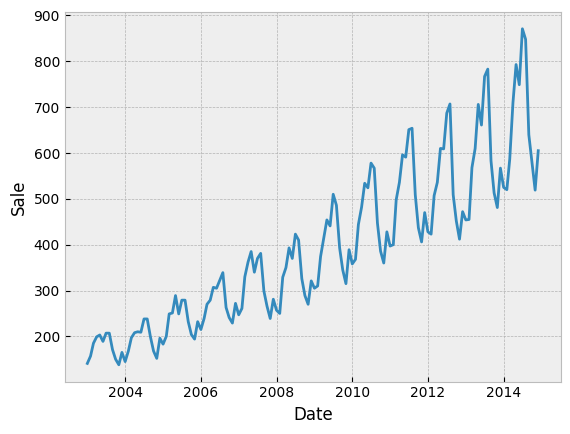

In [ ]:
# Plotting graph

plt.xlabel("Date")
plt.ylabel("Sale")
plt.plot(df)

In [ ]:
#determining rolling statistics

rolmean=df.rolling(window=12).mean()
rolstd=df.rolling(window=12).std()
print(rolmean,rolstd)

                  Sale
2003-01-01         NaN
2003-02-01         NaN
2003-03-01         NaN
2003-04-01         NaN
2003-05-01         NaN
...                ...
2014-08-01  645.583333
2014-09-01  650.333333
2014-10-01  656.000000
2014-11-01  659.166667
2014-12-01  662.333333

[144 rows x 1 columns]                   Sale
2003-01-01         NaN
2003-02-01         NaN
2003-03-01         NaN
2003-04-01         NaN
2003-05-01         NaN
...                ...
2014-08-01  140.409439
2014-09-01  139.057433
2014-10-01  134.254846
2014-11-01  130.136874
2014-12-01  128.137237

[144 rows x 1 columns]


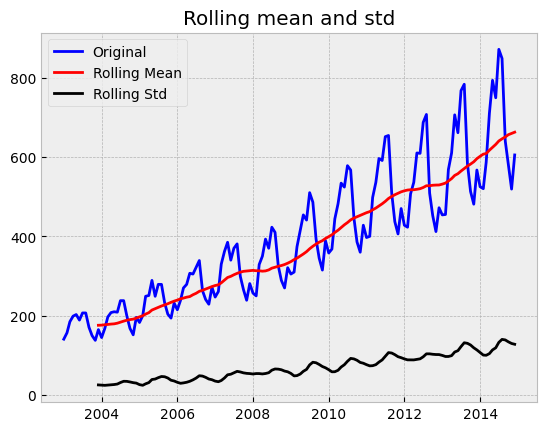

In [ ]:
# plot roll statistics

orig=plt.plot(df,color="blue",label="Original")
mean=plt.plot(rolmean,color="red",label="Rolling Mean")
std=plt.plot(rolstd,color="black",label="Rolling Std")
plt.legend(loc="best")
plt.title("Rolling mean and std")
plt.show()

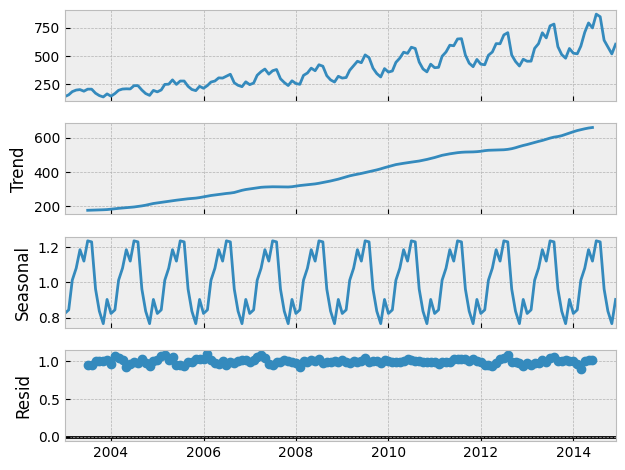

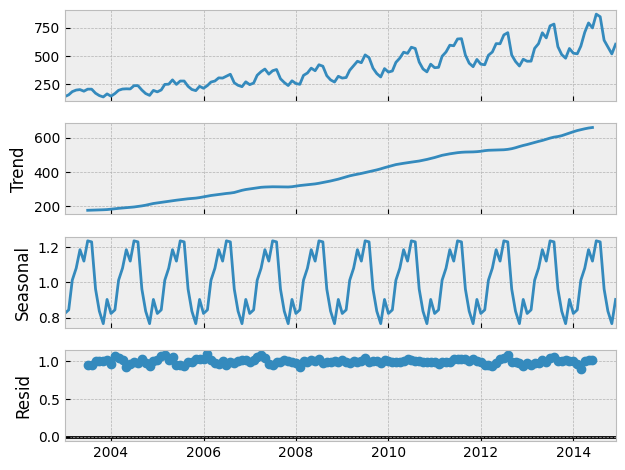

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

ts_decompose=seasonal_decompose(df,model="multiplicative",period=12)
ts_decompose.plot()

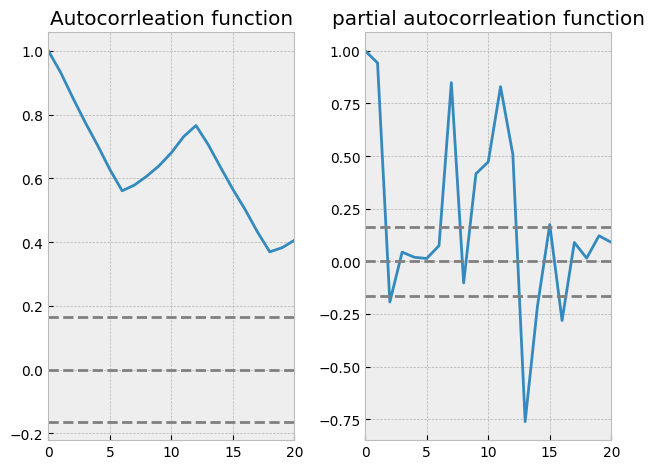

In [ ]:
from statsmodels.tsa.stattools import acf,pacf

lag_acf=acf( df, nlags=20)
lag_pacf=pacf( df,nlags=20,method="ols")

#plot ACF

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color="gray")
plt.axhline(y=-1.96/np.sqrt(len(df)),linestyle="--",color="gray")
plt.axhline(y=1.96/np.sqrt(len(df)),linestyle="--",color="gray")
plt.title("Autocorrleation function")
plt.xlim([0,20])


#plot PACF

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color="gray")
plt.axhline(y=-1.96/np.sqrt(len(df)),linestyle="--",color="gray")
plt.axhline(y=1.96/np.sqrt(len(df)),linestyle="--",color="gray")
plt.title("partial autocorrleation function")
plt.xlim([0,20])
plt.tight_layout()

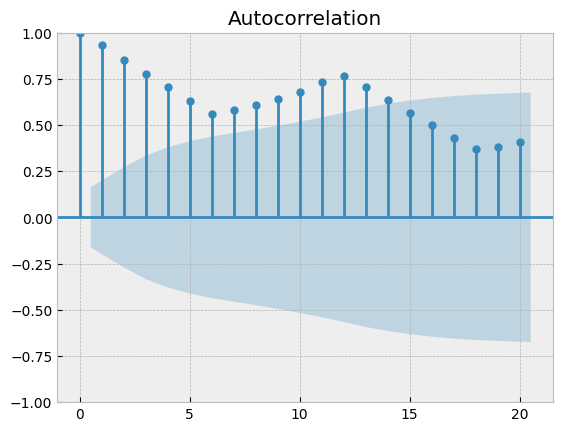

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

acf_plot=plot_acf(df,lags=20)

**Null hypothesis rejected only For lag=1 (i.e. auto_correlation is statisticaly significant)**

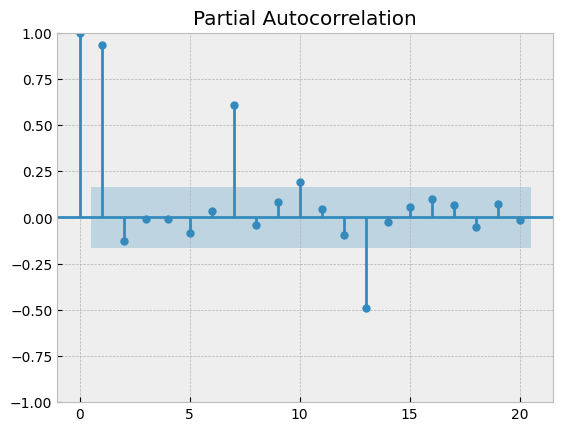

In [ ]:
pacf_plot=plot_pacf(df,lags=20)

In [ ]:
# Define the d and q parameters to take any value between 0 and 1

q = d = range(0, 2)

# Define the p parameters to take any value between 0 and 3

p = range(0, 4)

# Generate all different combinations of p, q and q triplets

pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

AIC = []
SARIMAX_model = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic), end='\r')
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            continue

In [ ]:
print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), SARIMAX_model[AIC.index(min(AIC))][0],SARIMAX_model[AIC.index(min(AIC))][1]))

The smallest AIC is 799.906428267067 for model SARIMAX(3, 1, 0)x(3, 1, 1, 12)


In [ ]:
SARIMAX_model[AIC.index(min(AIC))][0]

(3, 1, 0)

In [ ]:
SARIMAX_model[AIC.index(min(AIC))][1]

(3, 1, 1, 12)

In [ ]:
# Implementing SARIMAX model

mod=sm.tsa.statespace.SARIMAX(df,
                             order=SARIMAX_model[AIC.index(min(AIC))][0],
                             seasonal_order=SARIMAX_model[AIC.index(min(AIC))][1],
                             eforce_stationarity=False,
                             enforce_invertibility=False)
results=mod.fit()

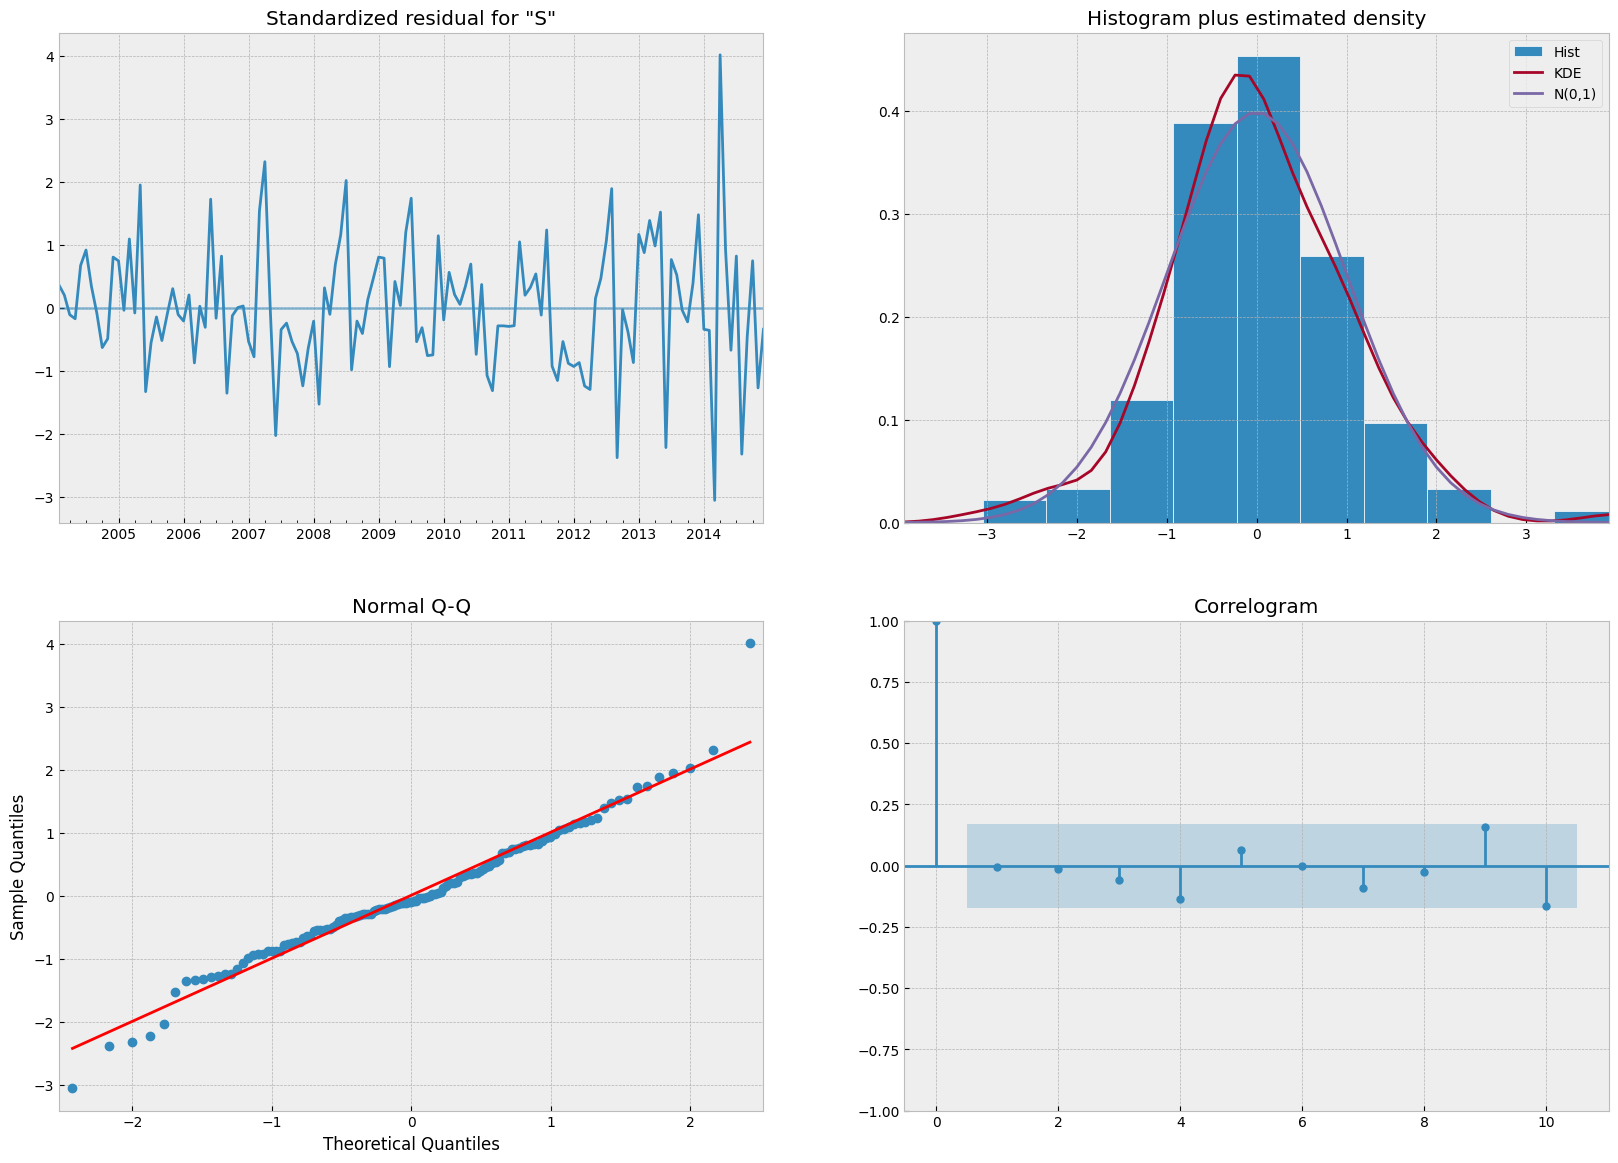

In [ ]:
results.plot_diagnostics(figsize=(20,14))

plt.show()

In [ ]:
df.head()

,Sale
2003-01-01,141
2003-02-01,157
2003-03-01,185
2003-04-01,199
2003-05-01,203


In [ ]:
pred1=results.get_prediction(start="2003-01-01",dynamic=False)
pred1_ci=pred1.conf_int()


pred2=results.get_forecast("2015-01-01")
pred2_ci=pred2.conf_int()

pred0=results.get_prediction(start="2003-01-01",dynamic=False)
pred0_ci=pred0.conf_int()

pred1=results.get_prediction(start="2003-01-01",dynamic=True)
pred1_ci=pred1.conf_int()

pred2=results.get_forecast("2016-01-01")
pred2_ci=pred2.conf_int()

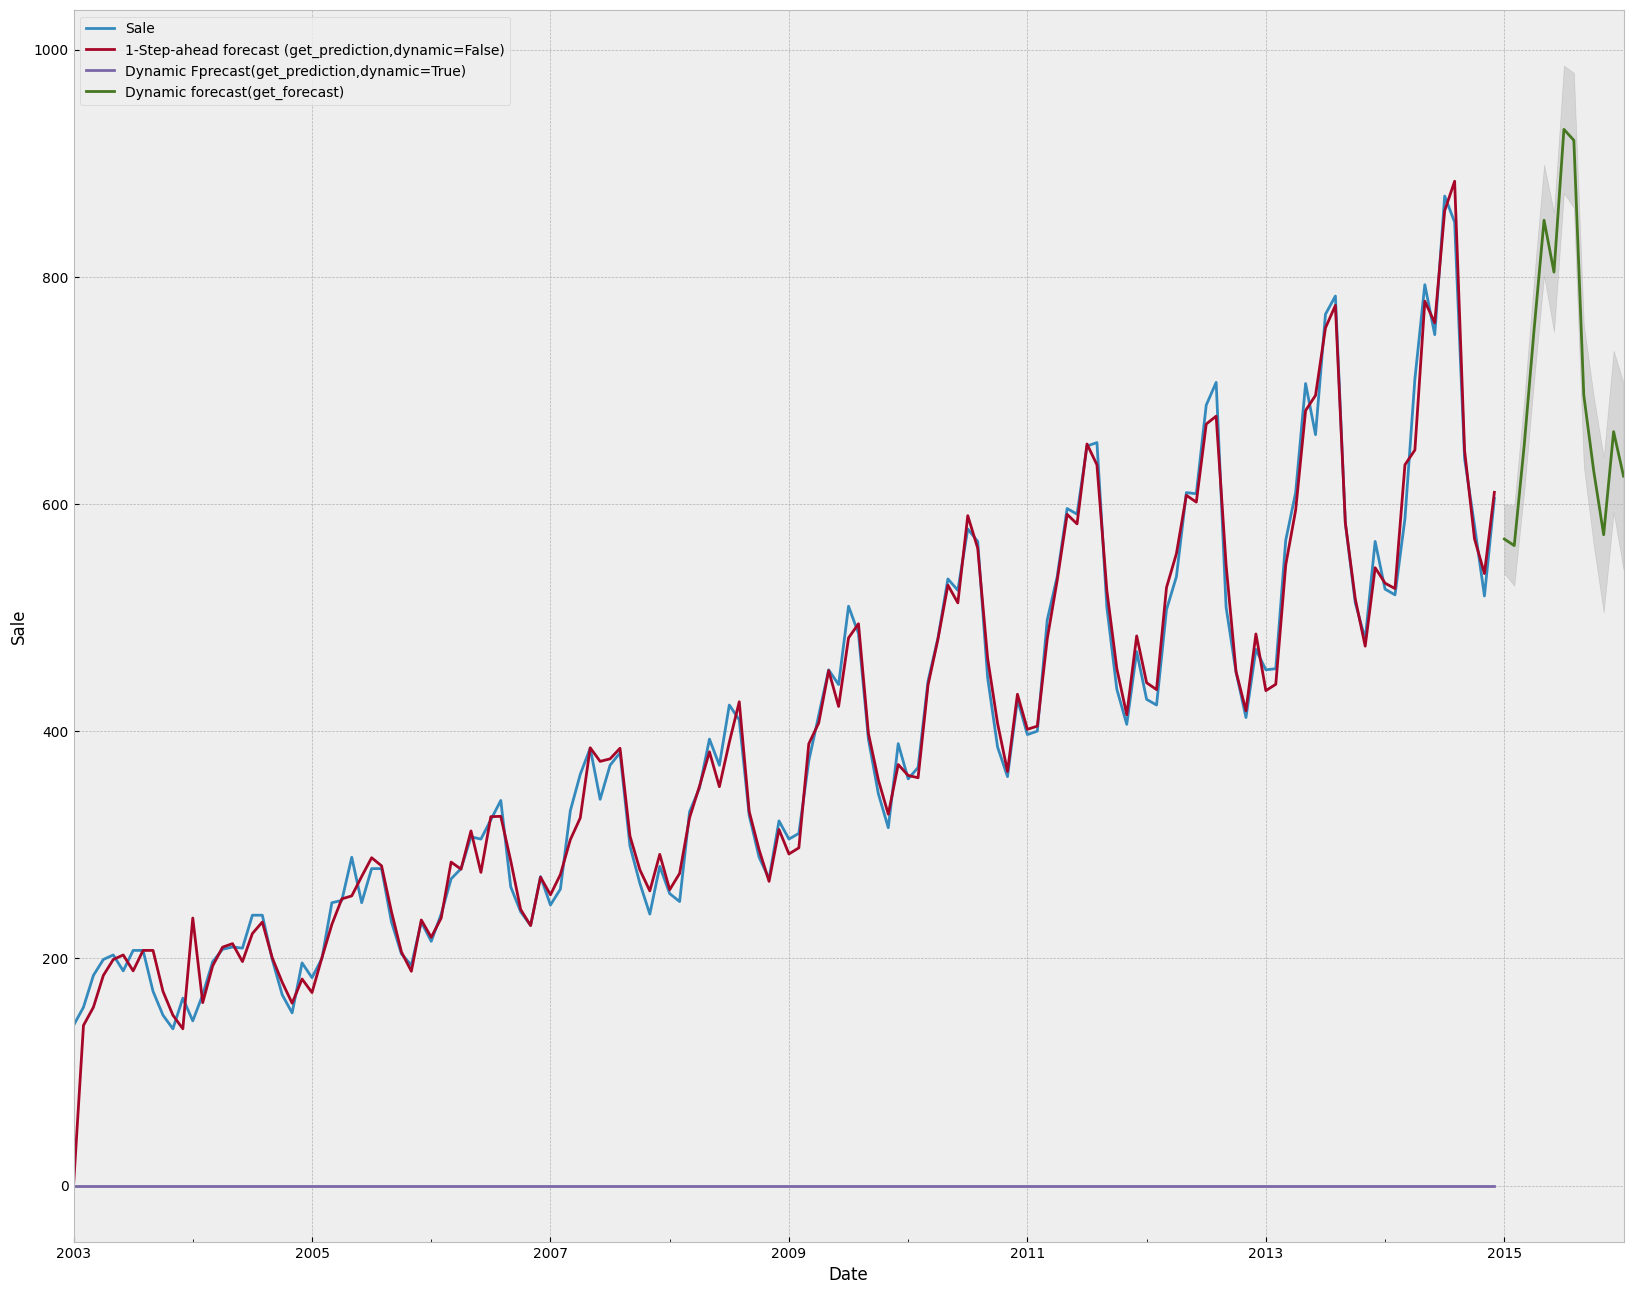

In [ ]:
ax=df.plot(figsize=(20,16))
pred0.predicted_mean.plot(ax=ax,label="1-Step-ahead forecast (get_prediction,dynamic=False)")
pred1.predicted_mean.plot(ax=ax,label="Dynamic Fprecast(get_prediction,dynamic=True)")
pred2.predicted_mean.plot(ax=ax,label="Dynamic forecast(get_forecast)")
ax.fill_between(pred2_ci.index,pred2_ci.iloc[:,0],pred2_ci.iloc[:,1],color='k',alpha=.1)
plt.xlabel("Date")
plt.ylabel("Sale")
plt.legend()
plt.show()

In [ ]:
y_actual=df["Sale"]

y_pred=pred0.predicted_mean

In [ ]:
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(y_actual,y_pred)
MAE

13.94481469947659

In [ ]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_actual,y_pred)
MSE

459.75850386859463

In [ ]:
RMSE=np.sqrt(MSE)
print(RMSE)

21.441979942826983


In [ ]:
MAPE=np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100
print(MAPE)

4.7514385381328905


In [ ]:
# Implementing exponential Smoothing Model

from statsmodels.tsa.holtwinters import ExponentialSmoothing

# We will use additive seasonality and trend, and estimate initial values

model_ets = ExponentialSmoothing(df['Sale'], seasonal='add', seasonal_periods=12, trend='add', initialization_method='estimated')

# Fit the model to the data

fit_ets = model_ets.fit()

In [ ]:
# Generate in-sample predictions (point estimates)

ets_pred_in_sample = fit_ets.fittedvalues

#  Generate approximate in-sample confidence intervals
#  We will approximate a 95% confidence interval using the Root Mean Squared Error (RMSE) of the in-sample residuals.

residuals = fit_ets.resid
rmse_fit = np.sqrt(np.mean(residuals**2))
z_score = 1.96        # For a 95% confidence interval

ets_pred_in_sample_ci_lower = ets_pred_in_sample - z_score * rmse_fit
ets_pred_in_sample_ci_upper = ets_pred_in_sample + z_score * rmse_fit

ets_pred_in_sample_ci = pd.DataFrame({
    'lower': ets_pred_in_sample_ci_lower,
    'upper': ets_pred_in_sample_ci_upper
}, index=ets_pred_in_sample.index)

# Generate future forecasts and confidence intervals
# forecasting for Jan 2015 to Jan 2016, which is 13 steps.

forecast_steps = 13

# Use the forecast method to get point forecasts.

ets_forecast = fit_ets.forecast(steps=forecast_steps)

# Construct confidence intervals for future forecasts using the same RMSE approximation

ets_forecast_ci_lower = ets_forecast - z_score * rmse_fit
ets_forecast_ci_upper = ets_forecast + z_score * rmse_fit

ets_forecast_ci = pd.DataFrame({
    'lower': ets_forecast_ci_lower,
    'upper': ets_forecast_ci_upper
}, index=ets_forecast.index)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Actual values from the DataFrame

y_actual_ets = df['Sale']

# In-sample predictions from the Exponential Smoothing model

y_pred_ets = ets_pred_in_sample

y_actual_ets = y_actual_ets.loc[y_pred_ets.index]

mae_ets = mean_absolute_error(y_actual_ets, y_pred_ets)

mse_ets = mean_squared_error(y_actual_ets, y_pred_ets)

rmse_ets = np.sqrt(mse_ets)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)

    # Avoid division by zero for actual values of 0

    return np.mean(np.abs((y_true - y_pred) / y_true[y_true != 0])) * 100

mape_ets = mean_absolute_percentage_error(y_actual_ets, y_pred_ets)

# Print the calculated performance metrics

print(f"Exponential Smoothing Model Performance Metrics:")
print(f"  MAE: {mae_ets:.4f}")
print(f"  MSE: {mse_ets:.4f}")
print(f"  RMSE: {rmse_ets:.4f}")
print(f"  MAPE: {mape_ets:.4f}%")

Exponential Smoothing Model Performance Metrics:
  MAE: 14.3614
  MSE: 340.5106
  RMSE: 18.4529
  MAPE: 3.8682%


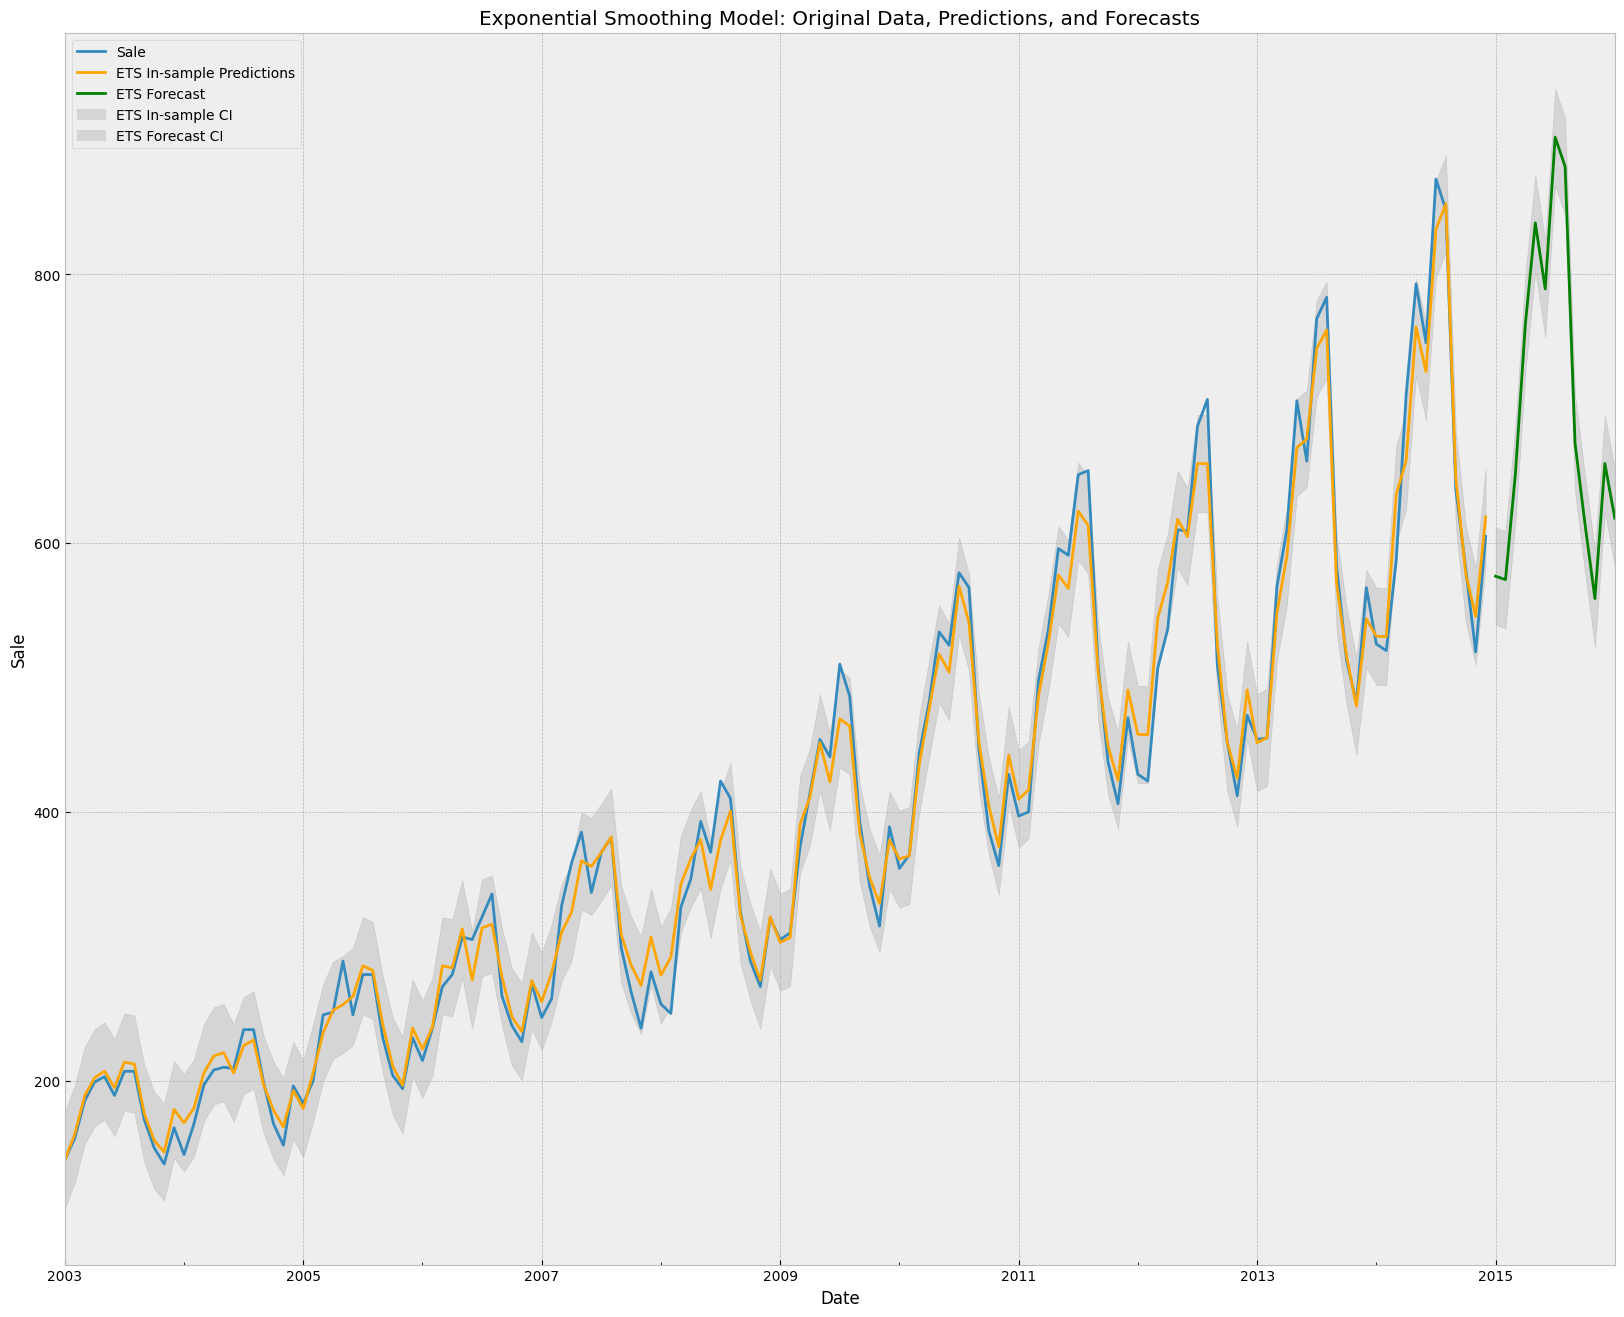

In [ ]:
# Create a plot with the original data

ax = df.plot(figsize=(20, 16), label='Original Data')

ets_pred_in_sample.plot(ax=ax, label='ETS In-sample Predictions', color='orange')

ets_forecast.plot(ax=ax, label='ETS Forecast', color='green')

ax.fill_between(ets_pred_in_sample_ci.index, ets_pred_in_sample_ci['lower'], ets_pred_in_sample_ci['upper'], color='k', alpha=.1, label='ETS In-sample CI')

ax.fill_between(ets_forecast_ci.index, ets_forecast_ci['lower'], ets_forecast_ci['upper'], color='k', alpha=.1, label='ETS Forecast CI')

plt.xlabel("Date")
plt.ylabel("Sale")
plt.title("Exponential Smoothing Model: Original Data, Predictions, and Forecasts")
plt.legend()
plt.show()

In [ ]:
MAPE = np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100

print("SARIMAX Model Performance Metrics:")
print(f"  MAE: {MAE:.4f}")
print(f"  MSE: {MSE:.4f}")
print(f"  RMSE: {RMSE:.4f}")
print(f"  MAPE: {MAPE:.4f}%")

print("\nExponential Smoothing Model Performance Metrics:")
print(f"  MAE: {mae_ets:.4f}")
print(f"  MSE: {mse_ets:.4f}")
print(f"  RMSE: {rmse_ets:.4f}")
print(f"  MAPE: {mape_ets:.4f}%")

SARIMAX Model Performance Metrics:
  MAE: 13.9448
  MSE: 459.7585
  RMSE: 21.4420
  MAPE: 4.7514%

Exponential Smoothing Model Performance Metrics:
  MAE: 14.3614
  MSE: 340.5106
  RMSE: 18.4529
  MAPE: 3.8682%
